This code is licensed to University of Quesland. You are not permitted to share or distribute this code**

In [1]:
%%time
### GPU configuration
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
CPU times: user 11.3 ms, sys: 2.24 ms, total: 13.5 ms
Wall time: 113 ms


In [2]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
CPU times: user 1.44 s, sys: 258 ms, total: 1.69 s
Wall time: 28.8 s


In [3]:
%%time
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.3 MB/s eta 0:00:00
CPU times: user 205 ms, sys: 29.3 ms, total: 234 ms
Wall time: 21.1 s


In [4]:
%%time
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 4.9 MB/s eta 0:00:00
CPU times: user 106 ms, sys: 12.1 ms, total: 118 ms
Wall time: 10.2 s


In [5]:
%%time
import cv2
import numpy as np
import glob
import os

CPU times: user 64.2 ms, sys: 33.5 ms, total: 97.7 ms
Wall time: 633 ms


In [6]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

CPU times: user 5.02 s, sys: 597 ms, total: 5.62 s
Wall time: 6.63 s


In [7]:
%%time
import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import tensorflow as tf
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


CPU times: user 768 ms, sys: 54.5 ms, total: 822 ms
Wall time: 1.63 s


In [8]:
%%time
from matplotlib import pyplot as plt

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10.3 µs


In [44]:
%%time
labels = ["Bacterial_Spot", "Brown_Blight", "Dry","Healthy","Powdery_Mildew","Sooty_Mold"]
img_size = 64
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        # Loop through images in the current label's directory
        for img in os.listdir(path):
            try:
                # Read and convert the image to RGB format
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]

                # Resize the image to the preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size))

                # Append the resized image and its class number to the data list
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error reading or processing image {img} in {label} category: {e}")

    return data

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 16.2 µs


In [45]:
%%time
data_dir = get_data("/content/drive/MyDrive/Datasets for Testing/Jamun Leaf Disease")

CPU times: user 28.9 s, sys: 1.01 s, total: 30 s
Wall time: 59.3 s


In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
%%time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import time
import cv2
import glob
import matplotlib.pyplot as plt


CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 34.6 µs


In [47]:
%%time
image_names = glob.glob(os.path.join('/content/drive/MyDrive/Datasets for Testing/Jamun Leaf Disease', '*', '*'))
print("Total number of training images: ", len(image_names))

# Make image_names a pandas Series object
image_names = pd.Series(image_names)


Total number of training images:  2400
CPU times: user 11.9 ms, sys: 1.05 ms, total: 12.9 ms
Wall time: 64.6 ms


In [48]:
%%time
# train_df: a dataframe with 2 field: Filename, ClassId
data_df = pd.DataFrame()

# generate Filename field
data_df['Filename'] = image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
data_df['ClassId'] = image_names.map(lambda img_name: (img_name.split("/")[-2]))

data_df.head()

CPU times: user 5.79 ms, sys: 0 ns, total: 5.79 ms
Wall time: 5.7 ms


,Filename,ClassId
0,Sooty_Mold (167).jpg,Sooty_Mold
1,Sooty_Mold (154).jpg,Sooty_Mold
2,Sooty_Mold (132).jpg,Sooty_Mold
3,Sooty_Mold (184).jpg,Sooty_Mold
4,Sooty_Mold (137).jpg,Sooty_Mold


CPU times: user 213 ms, sys: 13 ms, total: 226 ms
Wall time: 255 ms


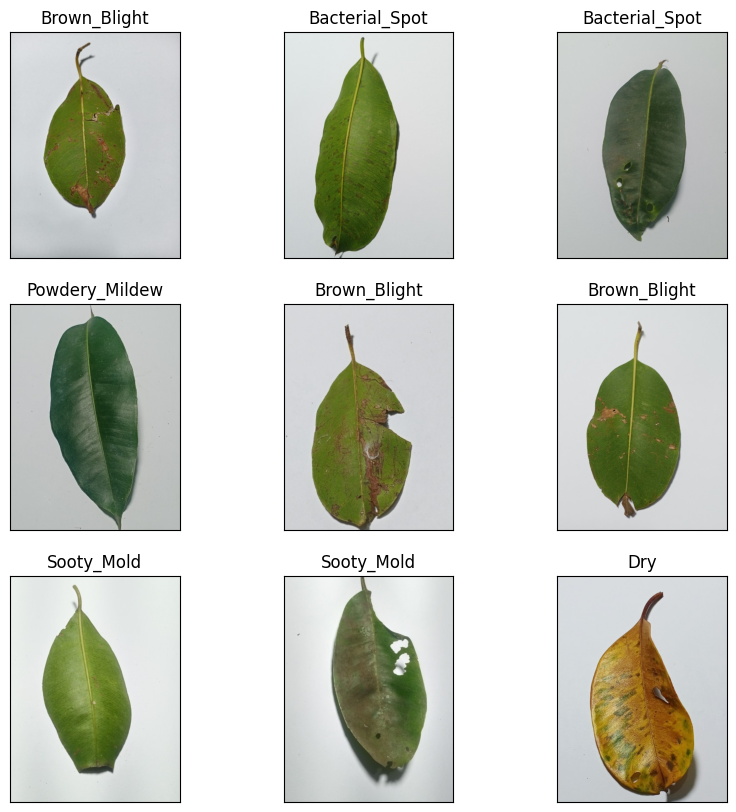

In [49]:
%%time
plot_df = data_df.sample(min(9, len(data_df))).reset_index()

plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('/content/drive/MyDrive/Datasets for Testing/Jamun Leaf Disease',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

In [50]:
%%time
class_id_distribution = data_df['ClassId'].value_counts()
class_id_distribution.head(10)

CPU times: user 2.76 ms, sys: 42 µs, total: 2.81 ms
Wall time: 4.08 ms


Sooty_Mold        400
Powdery_Mildew    400
Dry               400
Healthy           400
Brown_Blight      400
Bacterial_Spot    400
Name: ClassId, dtype: int64

CPU times: user 130 ms, sys: 1.92 ms, total: 132 ms
Wall time: 175 ms


<BarContainer object of 6 artists>

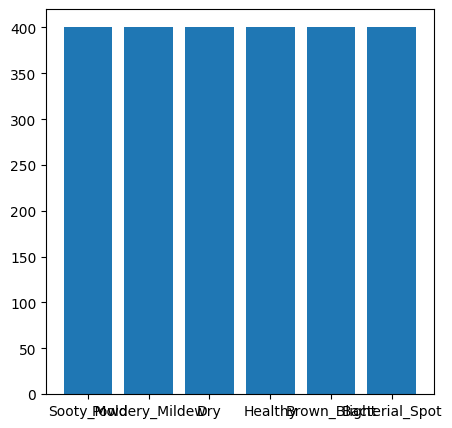

In [51]:
%%time
plt.figure(figsize=(5,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values)

CPU times: user 24.3 ms, sys: 30 µs, total: 24.3 ms
Wall time: 24.7 ms


Text(0.5, 1.0, 'Bacterial_Spot')

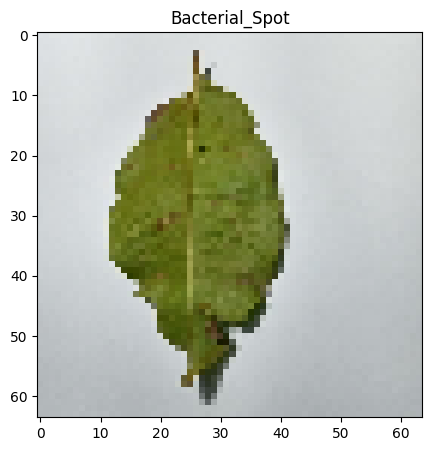

In [52]:
%%time
plt.figure(figsize = (5,5))
plt.imshow(data_dir[1][0])
plt.title(labels[data_dir[0][1]])


In [53]:
%%time
X = []
Y = []


for feature, label in data_dir:
  X.append(feature)
  Y.append(label)
X = np.array(X) / 255
X.reshape(-1, img_size, img_size, 1)
Y = np.array(Y)

CPU times: user 50.9 ms, sys: 128 ms, total: 179 ms
Wall time: 179 ms


In [54]:
%%time
print(X.shape)

(2400, 64, 64, 3)
CPU times: user 87 µs, sys: 5 µs, total: 92 µs
Wall time: 96.6 µs


In [55]:
%%time
# split with a stratified sampling
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=42)

CPU times: user 39.6 ms, sys: 117 ms, total: 156 ms
Wall time: 159 ms


In [56]:
%%time
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
    test_size=0.18, random_state= 8) # 0.25 x 0.8 = 0.2

CPU times: user 43.3 ms, sys: 101 ms, total: 145 ms
Wall time: 147 ms


In [57]:
%%time
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (1771, 64, 64, 3) - y_train shape: (1771,)
x_val shape: (389, 64, 64, 3) - y_val shape: (389,)
x_test shape: (240, 64, 64, 3) - y_test shape: (240,)
CPU times: user 227 µs, sys: 0 ns, total: 227 µs
Wall time: 209 µs


In [58]:
%%time
!pip install -U tensorflow-addons

CPU times: user 61.3 ms, sys: 11 ms, total: 72.3 ms
Wall time: 6.03 s


In [59]:
%%time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

CPU times: user 29 µs, sys: 2 µs, total: 31 µs
Wall time: 35.5 µs


In [60]:
%%time
num_classes = 6
input_shape = (64, 64, 3)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


In [61]:
%%time
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 250
image_size = 64  # We'll resize input images to this size
patch_size = 12  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 3
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 1
mlp_head_units = [2048, 1024]

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.1 µs


In [62]:
%%time
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

CPU times: user 1.03 s, sys: 204 ms, total: 1.23 s
Wall time: 2.04 s


In [63]:
%%time
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


In [64]:
%%time
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

CPU times: user 67 µs, sys: 0 ns, total: 67 µs
Wall time: 71.3 µs


Image size: 64 X 64
Patch size: 12 X 12
Patches per image: 25
Elements per patch: 432
CPU times: user 1.11 s, sys: 25.9 ms, total: 1.14 s
Wall time: 1.33 s


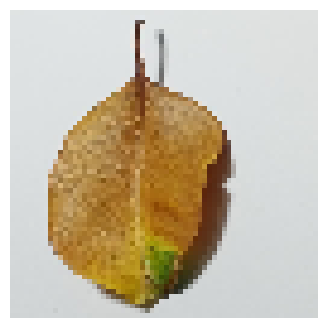

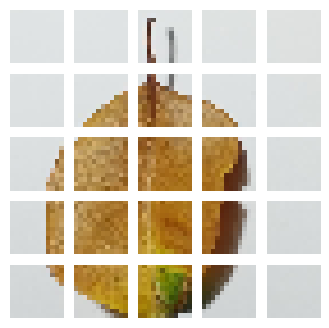

In [65]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("float"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("float"))
    plt.axis("off")

In [66]:
%%time
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

CPU times: user 64 µs, sys: 0 ns, total: 64 µs
Wall time: 69.1 µs


In [67]:
%%time
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [68]:
%%time
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
    model.summary()

    checkpoint_filepath = "/content/drive/MyDrive/model/model64_12.h5"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,

        lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                  cooldown= 10,
                                                  patience=10,
                                                  verbose =1,
                                                  min_lr=0.1e-7),


# stop learining as metric on validatopn stop increasing
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=15,
                                                  verbose=1,
                                                  mode = 'auto')
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


In [69]:
%%time
vit_classifier = create_vit_classifier()
vit_history = run_experiment(vit_classifier)

Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7c5af925f7c0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7c5af925f7c0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7c5af448d8a0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7c5af448d8a0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 data_augmentation (Seq

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-69-8aad53767f5e>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/google/colab/_shell.py", line 334, in run_cell_magic

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2473, in run_cell_magic

  File "<decorator-gen-54>", line 2, in time

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/execution.py", line 1335, in time

  File "<timed exec>", line 2, in <module>

  File "<timed exec>", line 36, in run_experiment

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 5 4 2 4 0 3 3 5 1 0 0 2 1 4 3 4 3 0 1 1 4 1 2 3 1 2 2 2 5 3 4 4 1 1 4 1 2 3 5 3 4 2 1 2 5 3 2 1 0 0 0 2 0 5 1 1 2 4 2 3 5 5 4 2 5 2 0 3 0 4 4 3 4 5 1 0 3 3 3 0 5 3 4 1 0 5 0 1 0 5 3 1 1 5 2 0 3 3 3 4 5 4 5 2 0 1 1 2 5 2 3 4 5 2 1 0 4 2 5 0 3 2 2 0 2 3 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_6286]

NameError: name 'vit_history' is not defined

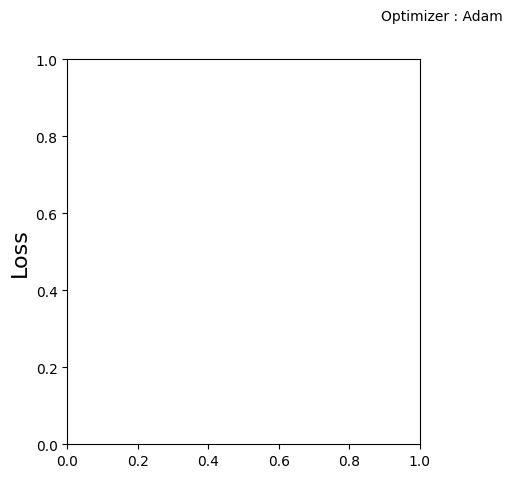

In [70]:
%%time
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(vit_history.history['accuracy'], label='Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [71]:
%%time
vit_predictions = vit_classifier.predict(x_val)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

13/13 [==============================] - 1s 42ms/step
CPU times: user 1.15 s, sys: 43.6 ms, total: 1.19 s
Wall time: 1.49 s


In [72]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 16.9 µs


Confusion matrix, without normalization
[[15  9 31  0  4  0]
 [20  1 24  1  9  0]
 [24  9 33  2  6  0]
 [13 13 36  2  3  0]
 [17 10 26  1  5  0]
 [21 14 28  3  9  0]]


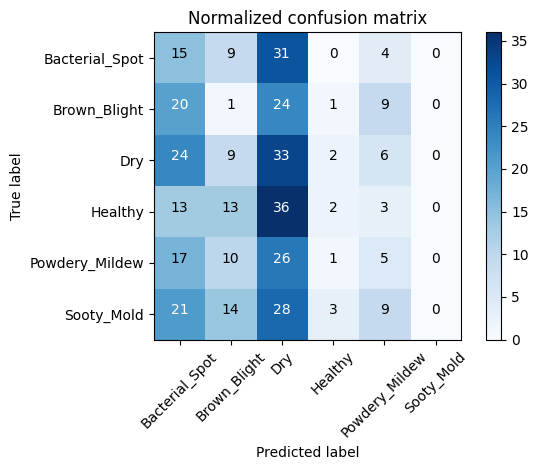

CPU times: user 543 ms, sys: 49.1 ms, total: 592 ms
Wall time: 800 ms


In [73]:
# compute confusion matrix
%%time
cnf_matrix = confusion_matrix(y_val, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Bacterial_Spot", "Brown_Blight", "Dry","Healthy","Powdery_Mildew","Sooty_Mold"], title='Normalized confusion matrix')
plt.show()

In [74]:
%%time
print(classification_report(y_val, vit_y_pred, target_names=["Bacterial_Spot", "Brown_Blight", "Dry","Healthy","Powdery_Mildew","Sooty_Mold"]))



                precision    recall  f1-score   support

Bacterial_Spot       0.14      0.25      0.18        59
  Brown_Blight       0.02      0.02      0.02        55
           Dry       0.19      0.45      0.26        74
       Healthy       0.22      0.03      0.05        67
Powdery_Mildew       0.14      0.08      0.11        59
    Sooty_Mold       0.00      0.00      0.00        75

      accuracy                           0.14       389
     macro avg       0.12      0.14      0.10       389
  weighted avg       0.12      0.14      0.10       389

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 17.5 ms


In [75]:
%%time
vit_predictions = vit_classifier.predict(x_test)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

8/8 [==============================] - 0s 47ms/step
CPU times: user 460 ms, sys: 33.3 ms, total: 493 ms
Wall time: 776 ms


In [76]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15 µs


Confusion matrix, without normalization
[[ 7  7 21  1  4  0]
 [18  5 12  0  5  0]
 [ 9  7 16  0  8  0]
 [13  8 17  1  1  0]
 [ 8  6 21  1  4  0]
 [ 4  5 24  1  6  0]]


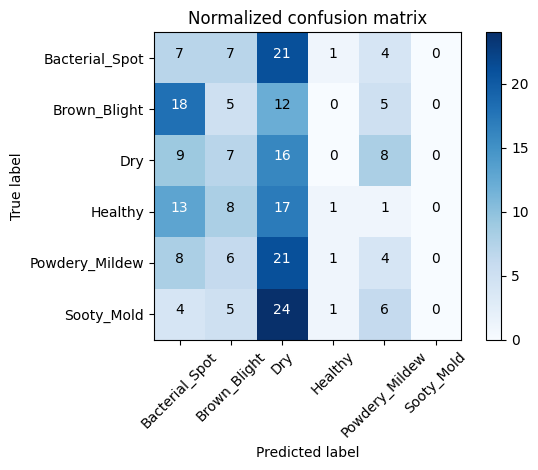

CPU times: user 546 ms, sys: 33.7 ms, total: 579 ms
Wall time: 1.69 s


In [77]:
# compute confusion matrix
%%time
cnf_matrix = confusion_matrix(y_test, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Bacterial_Spot", "Brown_Blight", "Dry","Healthy","Powdery_Mildew","Sooty_Mold"], title='Normalized confusion matrix')
plt.show()

In [78]:
%%time
print(classification_report(y_test, vit_y_pred, target_names=["Bacterial_Spot", "Brown_Blight", "Dry","Healthy","Powdery_Mildew","Sooty_Mold"]))



                precision    recall  f1-score   support

Bacterial_Spot       0.12      0.17      0.14        40
  Brown_Blight       0.13      0.12      0.13        40
           Dry       0.14      0.40      0.21        40
       Healthy       0.25      0.03      0.05        40
Powdery_Mildew       0.14      0.10      0.12        40
    Sooty_Mold       0.00      0.00      0.00        40

      accuracy                           0.14       240
     macro avg       0.13      0.14      0.11       240
  weighted avg       0.13      0.14      0.11       240

CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 30.8 ms
